### Import all required libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

### Exploring the dataset                                           


### Loading the dataset

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

In [2]:
train_data = pd.read_csv(r'C:\Users\91946\Documents\DEEP LEARNING\DataSet DL\train.csv')
print(train_data.shape)
train_data.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv(r'C:\Users\91946\Documents\DEEP LEARNING\DataSet DL\test.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


Test Data has 28000 images of size 784(28*28)

In [8]:
train_data.isnull().sum().sort_values(ascending = False) 

pixel783    0
pixel267    0
pixel265    0
pixel264    0
pixel263    0
           ..
pixel519    0
pixel518    0
pixel517    0
pixel516    0
label       0
Length: 785, dtype: int64

In [9]:
test.isnull().sum().sort_values(ascending = False) 

pixel783    0
pixel268    0
pixel266    0
pixel265    0
pixel264    0
           ..
pixel520    0
pixel519    0
pixel518    0
pixel517    0
pixel0      0
Length: 784, dtype: int64

No Null Values here

 Data is alredy clean and  ready to use

### Data collection and preparation

In [10]:
data_labels = train_data['label']
Y = data_labels
data_new = train_data.drop(['label'], axis=1)


data_arr = np.array(data_new).reshape(-1,28,28)

Divided all of the data by 255.0, is meant for normalize the dataset value
if its not divied by 255.0, then the neural network will be constant

In [11]:
data_clean = data_arr / 255.0  
data = data_clean

In [12]:
X = data
test_new = test
test_arr = np.array(test_new).reshape(-1,28,28)
test_clean = test_arr / 255.0
test_data = test_clean

###  Visualization

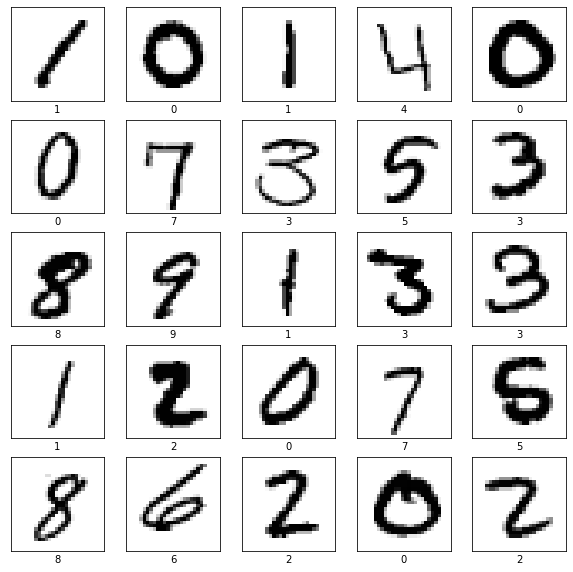

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i], cmap=plt.cm.binary)
    plt.xlabel(data_labels[i])
plt.show()

### Data split into training and test splits

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , random_state=1, test_size=0.2)

In [15]:
X_train.shape

(33600, 28, 28)

In [16]:
X_test.shape

(8400, 28, 28)

In [17]:
Y_test.shape

(8400,)

In [18]:
Y_train.shape

(33600,)

### Building the Model

### 1.Setting up layers

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### 2.Compile the Model

In [40]:
model.compile(optimizer='adam',                   ## optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  ## Multiclass Classification
              metrics=['accuracy'])

### 3.Train the Model

In [44]:
model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1050/1050 [==============================] - 1s 1ms/step - loss: 2.9667e-04 - accuracy: 1.0000
Epoch 2/20
1050/1050 [==============================] - 1s 1ms/step - loss: 1.1928e-04 - accuracy: 1.0000
Epoch 3/20
1050/1050 [==============================] - 1s 1ms/step - loss: 8.6299e-05 - accuracy: 1.0000
Epoch 4/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0106 - accuracy: 0.9964
Epoch 5/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0035 - accuracy: 0.9988
Epoch 6/20
1050/1050 [==============================] - 1s 1ms/step - loss: 5.0795e-04 - accuracy: 0.9999
Epoch 7/20
1050/1050 [==============================] - 1s 1ms/step - loss: 1.8894e-04 - accuracy: 1.0000
Epoch 8/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0081 - accuracy: 0.9976
Epoch 9/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0025 - accuracy: 0.9992
Epoch 10/20
1050/1050 [==============================] - 1s 1m

### 4.Evaluate the model

In [48]:
test_loss, test_accuracy = model.evaluate(X_test,  Y_test, verbose=2)

print('\nTest accuracy:', test_accuracy*100,"%")

263/263 - 0s - loss: 0.1629 - accuracy: 0.9775

Test accuracy: 97.75000214576721 %


In [47]:
train_loss, train_accuracy = model.evaluate(X_train,  Y_train, verbose=2)

print('\nTrain accuracy:', train_accuracy*100,"%")

1050/1050 - 1s - loss: 3.1495e-05 - accuracy: 1.0000

Train accuracy: 100.0 %


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Make predictions

In [25]:
pred = model.predict(test_data)
pred

array([[-14.90122  , -24.907421 ,  26.480179 , ..., -11.507297 ,
         -8.681779 , -10.759724 ],
       [ 12.934109 , -11.606033 ,  -6.1885123, ...,  -2.2554564,
        -24.37701  , -20.756615 ],
       [-16.293098 , -10.427308 ,  -5.3749194, ...,  -3.2196488,
         -1.5562683,   8.093981 ],
       ...,
       [-23.949411 ,  -4.515711 , -12.46023  , ..., -16.65759  ,
         -4.9467516,  -2.5562594],
       [-16.672718 , -21.235048 , -20.642447 , ...,  -2.1587827,
         -7.267144 ,  13.84723  ],
       [-21.735756 , -23.078108 ,  22.816412 , ..., -19.93302  ,
        -11.694094 , -11.91122  ]], dtype=float32)

In [26]:
# select the index with the maximum probability
pred = np.argmax(pred,axis = 1)
pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)